# Pipelines

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/3gob0mX', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
X.shape

(569, 30)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

Debido a que el conjunto no está balanceado (no hay la misma cantidad de **M** que de **B**), tenemos que usar ```stratify``` para que la selección esté mas o menos balanceada.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

## Pipeline

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print("Exactitud en test = %.4f" % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.9561


## k-fold cross-validation

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(f"Pliegue {k+1} : Distribución por clase : {np.bincount(y_train[train])}, Accuracy {score}")

Pliegue 1 : Distribución por clase : [256 153], Accuracy 0.9347826086956522
Pliegue 2 : Distribución por clase : [256 153], Accuracy 0.9347826086956522
Pliegue 3 : Distribución por clase : [256 153], Accuracy 0.9565217391304348
Pliegue 4 : Distribución por clase : [256 153], Accuracy 0.9565217391304348
Pliegue 5 : Distribución por clase : [256 153], Accuracy 0.9347826086956522
Pliegue 6 : Distribución por clase : [257 153], Accuracy 0.9555555555555556
Pliegue 7 : Distribución por clase : [257 153], Accuracy 0.9777777777777777
Pliegue 8 : Distribución por clase : [257 153], Accuracy 0.9333333333333333
Pliegue 9 : Distribución por clase : [257 153], Accuracy 0.9555555555555556
Pliegue 10 : Distribución por clase : [257 153], Accuracy 0.9555555555555556


In [10]:
print(f"Exactitud de k-fold : {np.mean(scores)} +/- {np.std(scores)}")

Exactitud de k-fold : 0.9495169082125603 +/- 0.013854294239660376


In [11]:
from sklearn.model_selection import cross_val_score
#cv -> número de pliegues (folds)
#n_jobs (valor por default = 1) -> cuando tenemos varios núcleos
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train, y=y_train,
                         cv=10, n_jobs=1)
print(f"Exactitud por iteración : {scores}")
print(f"Exactitud de validación cruzada : {np.mean(scores)} +/- {np.std(scores)}")

Exactitud por iteración : [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
Exactitud de validación cruzada : 0.9495169082125603 +/- 0.013854294239660376


## Curvas de aprendizaje


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

#penalty es el grado de regularización
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))

#cv -> cross validation. (9 de entrenamiento y uno de prueba)
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1,10), cv=10)

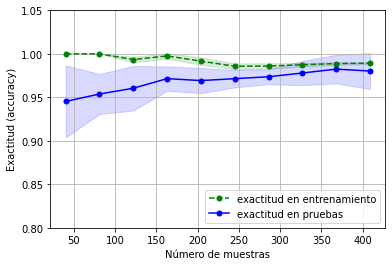

In [34]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="green", marker='o',markersize=5, linestyle="--", label="exactitud en entrenamiento")
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std,alpha=0.15, color="green")

plt.plot(train_sizes, test_mean, color="blue", marker='o',markersize=5, label="exactitud en pruebas")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,alpha=0.15, color="blue")

plt.grid()
plt.xlabel("Número de muestras")
plt.ylabel("Exactitud (accuracy)")
plt.legend(loc="lower right")
plt.ylim([0.8,1.05])
plt.show()

A partir de 250 muestras, nuestro modelo ya ofrece resultado óptimos

## Curva de validación

Buscando sobreajuste o subajuste con un hiperparámetro

Regresión logística: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [40]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name="logisticregression__C", param_range=param_range, cv=10)

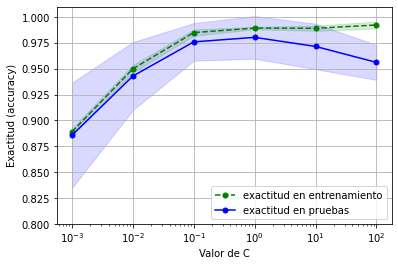

In [47]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color="green", marker='o',markersize=5, linestyle="--", label="exactitud en entrenamiento")
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std,alpha=0.15, color="green")

plt.plot(param_range, test_mean, color="blue", marker='o',markersize=5, label="exactitud en pruebas")
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,alpha=0.15, color="blue")

plt.grid()
plt.xscale("log")
plt.xlabel("Valor de C")
plt.ylabel("Exactitud (accuracy)")
plt.legend(loc="lower right")
plt.ylim([0.8,1.01])
plt.show()

Para este problema en particular, si usamos un valor de $C$ mayor, el modelo se sobreajusta. Para valores menores de $0.1$ el modelo estará subajustado. Por lo que los valores óptimos: $C \in (0.1,1]$